<a href="https://colab.research.google.com/github/John-G-Thomas/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/LS_DS_432_Train_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [4]:
# import cell
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
import sklearn.linear_model
import matplotlib.pyplot as plt
import tempfile
from sklearn.utils import shuffle
import os
# Our Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

In [6]:
data2 = np.load('quickdraw10.npz')

FileNotFoundError: [Errno 2] No such file or directory: 'quickdraw10.npz'

In [ ]:
def load_quickdraw10npz(path):
    X = path['arr_0']
    y = path['arr_1']
    X, y = shuffle(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [2]:
X_train, X_test, y_train, y_test = load_quickdraw10npz(path=data2)

NameError: name 'data2' is not defined

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(80000, 20000, 80000, 20000)

In [15]:
X_train.shape

(80000, 784)

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [69]:
def create_model(lr=.01):
  opt = tf.keras.optimizers.Adadelta(
    learning_rate=0.001, rho=0.95, epsilon=1e-07, name='Adadelta')

  model = Sequential(
      [
       Dense(50, activation='relu', input_dim=784),
       Dense(50, activation='relu')
]
)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
mnist_model = create_model(lr=.01)
dir(mnist_model)

In [54]:
mnist_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
Total params: 41,800
Trainable params: 41,800
Non-trainable params: 0
_________________________________________________________________


In [ ]:
"""model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28)),
    keras.layers.Reshape(target_shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])

# Train the digit classification model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])"""

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [57]:
mnist_model_32 = create_model(lr=.01)

bt_32= mnist_model_32.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=2,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/2
2500/2500 [==============================] - 5s 2ms/step - loss: 9.4636 - accuracy: 0.0496 - val_loss: 9.4438 - val_accuracy: 0.0501
Epoch 2/2
2500/2500 [==============================] - 5s 2ms/step - loss: 9.4195 - accuracy: 0.0493 - val_loss: 9.4014 - val_accuracy: 0.0498


In [58]:
mnist_model_16 = create_model()

bt_16 = mnist_model_16.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=2,
                                batch_size=16,
                                validation_data=(X_test, y_test))

Epoch 1/2
5000/5000 [==============================] - 11s 2ms/step - loss: 11.6213 - accuracy: 0.0061 - val_loss: 11.5918 - val_accuracy: 0.0068
Epoch 2/2
5000/5000 [==============================] - 10s 2ms/step - loss: 11.5320 - accuracy: 0.0073 - val_loss: 11.5153 - val_accuracy: 0.0081


In [59]:
mnist_model_8 = create_model()

bt_8 = mnist_model_8.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=2,
                                batch_size=8,
                                validation_data=(X_test, y_test))

Epoch 1/2
10000/10000 [==============================] - 21s 2ms/step - loss: 11.3006 - accuracy: 0.0140 - val_loss: 11.2066 - val_accuracy: 0.0126
Epoch 2/2
10000/10000 [==============================] - 21s 2ms/step - loss: 11.2319 - accuracy: 0.0136 - val_loss: 11.1498 - val_accuracy: 0.0122


In [60]:
mnist_model_64 = create_model()

bt_64 = mnist_model_64.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=2,
                                batch_size=64,
                                validation_data=(X_test, y_test))

Epoch 1/2
1250/1250 [==============================] - 3s 2ms/step - loss: 11.9915 - accuracy: 0.0216 - val_loss: 12.0094 - val_accuracy: 0.0204
Epoch 2/2
1250/1250 [==============================] - 3s 2ms/step - loss: 11.9110 - accuracy: 0.0218 - val_loss: 11.9389 - val_accuracy: 0.0208


In [61]:
mnist_model_128 = create_model()

bt_128 = mnist_model_128.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=2,
                                batch_size=128,
                                validation_data=(X_test, y_test))

Epoch 1/2
625/625 [==============================] - 1s 2ms/step - loss: 9.9614 - accuracy: 0.0232 - val_loss: 9.9095 - val_accuracy: 0.0226
Epoch 2/2
625/625 [==============================] - 1s 2ms/step - loss: 9.9144 - accuracy: 0.0234 - val_loss: 9.8705 - val_accuracy: 0.0229


In [62]:
# Viz Results
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_32, bt_16, bt_8, bt_64, bt_128], ["32_","16_","8_","64_","128_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,9.463621,0.049562,9.443810,0.05015,0,32_
1,9.419492,0.049300,9.401390,0.04975,1,32_
0,11.621302,0.006063,11.591763,0.00675,0,16_
1,11.532035,0.007325,11.515291,0.00810,1,16_
0,11.300570,0.013962,11.206576,0.01265,0,8_


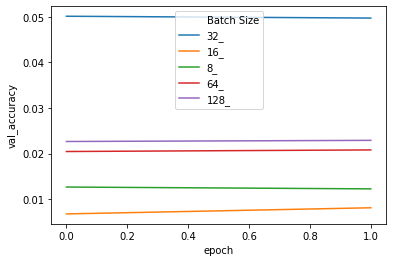

In [63]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

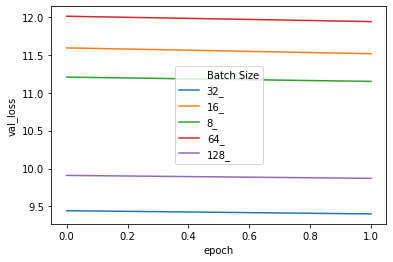

In [64]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [70]:
mnist_model_1 = create_model(lr=1)

bt_1 = mnist_model_1.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=2,
                                batch_size=128,
                                validation_data=(X_test, y_test))

Epoch 1/2
625/625 [==============================] - 1s 2ms/step - loss: 12.7498 - accuracy: 0.0229 - val_loss: 12.7443 - val_accuracy: 0.0226
Epoch 2/2
625/625 [==============================] - 1s 2ms/step - loss: 12.6876 - accuracy: 0.0229 - val_loss: 12.6763 - val_accuracy: 0.0227


In [71]:
mnist_model_01 = create_model(lr=.1)

bt_01 = mnist_model_01.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=2,
                                batch_size=128,
                                validation_data=(X_test, y_test))

Epoch 1/2
625/625 [==============================] - 1s 2ms/step - loss: 9.2398 - accuracy: 0.0202 - val_loss: 9.2733 - val_accuracy: 0.0225
Epoch 2/2
625/625 [==============================] - 1s 2ms/step - loss: 9.1899 - accuracy: 0.0204 - val_loss: 9.2247 - val_accuracy: 0.0227


In [72]:
mnist_model_001 = create_model(lr=.01)

bt_001 = mnist_model_001.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=2,
                                batch_size=128,
                                validation_data=(X_test, y_test))

Epoch 1/2
625/625 [==============================] - 1s 2ms/step - loss: 10.1793 - accuracy: 0.0088 - val_loss: 10.1399 - val_accuracy: 0.0086
Epoch 2/2
625/625 [==============================] - 1s 2ms/step - loss: 10.0932 - accuracy: 0.0093 - val_loss: 10.0530 - val_accuracy: 0.0088


In [73]:
mnist_model_0001 = create_model(lr=.001)

bt_0001 = mnist_model_0001.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=2,
                                batch_size=128,
                                validation_data=(X_test, y_test))

Epoch 1/2
625/625 [==============================] - 1s 2ms/step - loss: 9.3254 - accuracy: 0.0104 - val_loss: 9.3567 - val_accuracy: 0.0121
Epoch 2/2
625/625 [==============================] - 1s 2ms/step - loss: 9.2750 - accuracy: 0.0105 - val_loss: 9.3103 - val_accuracy: 0.0124


In [74]:
mnist_model_00001 = create_model(lr=.0001)

bt_00001 = mnist_model_00001.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=2,
                                batch_size=128,
                                validation_data=(X_test, y_test))

Epoch 1/2
625/625 [==============================] - 2s 3ms/step - loss: 11.3979 - accuracy: 0.0320 - val_loss: 11.3424 - val_accuracy: 0.0334
Epoch 2/2
625/625 [==============================] - 1s 2ms/step - loss: 11.3304 - accuracy: 0.0326 - val_loss: 11.2722 - val_accuracy: 0.0339


In [75]:
# Viz Results
batch_sizes = []

for exp, result in zip([bt_1 ,bt_01 ,bt_001, bt_0001, bt_00001], ["1_", ".1_", ".01_",".001_",".0001_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,12.749813,0.022875,12.744279,0.02260,0,1_
1,12.687602,0.022888,12.676325,0.02275,1,1_
0,9.239751,0.020225,9.273265,0.02250,0,.1_
1,9.189892,0.020400,9.224690,0.02275,1,.1_
0,10.179257,0.008850,10.139862,0.00855,0,.01_


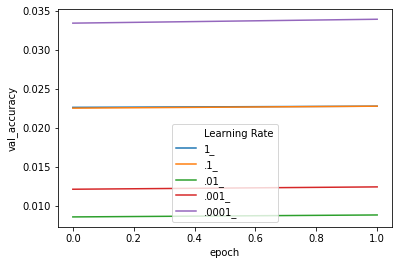

In [76]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

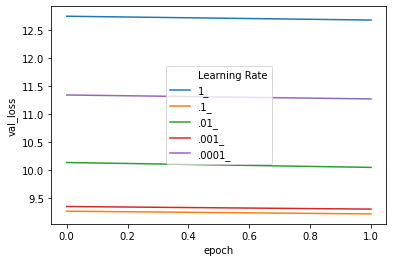

In [77]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [86]:
def create_model(lr=float):
  opt = tf.keras.optimizers.Adadelta(
    learning_rate=0.001, rho=0.95, epsilon=1e-07, name='Adadelta')

  model = Sequential(
      [
       Dense(50, activation='relu', input_dim=784),
       Dense(50, activation='relu')
]
)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [95]:
mnist_model_Adadelta = create_model(lr=.001)

mnist_model_Adadelta1 = mnist_model_Adadelta.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 9.5009 - accuracy: 0.0238 - val_loss: 9.6029 - val_accuracy: 0.0241
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 9.4203 - accuracy: 0.0241 - val_loss: 9.5149 - val_accuracy: 0.0244
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 9.3534 - accuracy: 0.0247 - val_loss: 9.4563 - val_accuracy: 0.0245
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 9.2851 - accuracy: 0.0250 - val_loss: 9.3875 - val_accuracy: 0.0249
Epoch 5/25
2500/2500 [==============================] - 6s 2ms/step - loss: 9.2226 - accuracy: 0.0257 - val_loss: 9.3195 - val_accuracy: 0.0257
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 9.1492 - accuracy: 0.0263 - val_loss: 9.2465 - val_accuracy: 0.0261
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 9.0894 - accuracy: 0.0269 - val_loss: 9.1882 - val_accuracy:

In [98]:
def create_model(lr=float):
  opt = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

  model = Sequential(
      [
       Dense(50, activation='relu', input_dim=784),
       Dense(50, activation='relu')
]
)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [99]:
mnist_model_Adam = create_model(lr=.001)

mnist_model_Adam1 = mnist_model_Adam.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 15.4688 - accuracy: 0.0182 - val_loss: 15.7802 - val_accuracy: 0.0041
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 15.8126 - accuracy: 0.0056 - val_loss: 15.5852 - val_accuracy: 0.0143
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 15.9762 - accuracy: 0.0045 - val_loss: 16.0687 - val_accuracy: 0.0010
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 13.6139 - accuracy: 0.0268 - val_loss: 3.9116 - val_accuracy: 0.1041
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 3.9046 - accuracy: 0.1066 - val_loss: 3.9092 - val_accuracy: 0.1042
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 3.9164 - accuracy: 0.1072 - val_loss: 3.9052 - val_accuracy: 0.1049
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 3.8980 - accuracy: 0.1072 - val_loss: 3.9052 - val_ac

In [100]:
def create_model(lr=float):
  opt = tf.keras.optimizers.Adagrad(
    learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07,
    name='Adagrad'
)

  model = Sequential(
      [
       Dense(50, activation='relu', input_dim=784),
       Dense(50, activation='relu')
]
)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [101]:
mnist_model_Adagrad = create_model(lr=.001)

mnist_model_Adagrad1 = mnist_model_Adagrad.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 7.2210 - accuracy: 0.0259 - val_loss: 5.7552 - val_accuracy: 0.0362
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 5.2576 - accuracy: 0.0427 - val_loss: 5.1028 - val_accuracy: 0.0457
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 4.8114 - accuracy: 0.0490 - val_loss: 4.7938 - val_accuracy: 0.0524
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 4.6191 - accuracy: 0.0563 - val_loss: 4.6449 - val_accuracy: 0.0600
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 4.4965 - accuracy: 0.0640 - val_loss: 4.5407 - val_accuracy: 0.0677
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 4.4115 - accuracy: 0.0707 - val_loss: 4.4627 - val_accuracy: 0.0725
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 4.3544 - accuracy: 0.0738 - val_loss: 4.4264 - val_accuracy:

In [102]:
def create_model(lr=float):
  opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop'
)

  model = Sequential(
      [
       Dense(50, activation='relu', input_dim=784),
       Dense(50, activation='relu')
]
)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [103]:
mnist_model_RMSprop = create_model(lr=.001)

mnist_model_RMSprop1 = mnist_model_RMSprop.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
2500/2500 [==============================] - 6s 2ms/step - loss: 14.7524 - accuracy: 1.0000e-04 - val_loss: 14.5163 - val_accuracy: 0.0022
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 14.6303 - accuracy: 8.7500e-05 - val_loss: 14.7851 - val_accuracy: 0.0000e+00
Epoch 3/25
2500/2500 [==============================] - 6s 2ms/step - loss: 14.7628 - accuracy: 2.5000e-05 - val_loss: 15.1651 - val_accuracy: 0.0000e+00
Epoch 4/25
2500/2500 [==============================] - 6s 2ms/step - loss: 14.3752 - accuracy: 0.0000e+00 - val_loss: 13.7427 - val_accuracy: 0.0000e+00
Epoch 5/25
2500/2500 [==============================] - 6s 2ms/step - loss: 13.4615 - accuracy: 0.0000e+00 - val_loss: 13.1878 - val_accuracy: 0.0000e+00
Epoch 6/25
2500/2500 [==============================] - 6s 2ms/step - loss: 13.3292 - accuracy: 0.0000e+00 - val_loss: 13.1814 - val_accuracy: 0.0000e+00
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 13.3

In [104]:
def create_model(lr=float):
  opt = tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'
)

  model = Sequential(
      [
       Dense(50, activation='relu', input_dim=784),
       Dense(50, activation='relu')
]
)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [105]:
mnist_model_Nadam = create_model(lr=.001)

mnist_model_Nadam1 = mnist_model_Nadam.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
2500/2500 [==============================] - 7s 3ms/step - loss: 15.7882 - accuracy: 0.0067 - val_loss: 15.5484 - val_accuracy: 0.0132
Epoch 2/25
2500/2500 [==============================] - 6s 3ms/step - loss: 15.8819 - accuracy: 0.0108 - val_loss: 15.7146 - val_accuracy: 0.0136
Epoch 3/25
2500/2500 [==============================] - 6s 3ms/step - loss: 15.4731 - accuracy: 0.0710 - val_loss: 15.3884 - val_accuracy: 0.0798
Epoch 4/25
2500/2500 [==============================] - 6s 3ms/step - loss: 15.5562 - accuracy: 0.0654 - val_loss: 16.0430 - val_accuracy: 0.0213
Epoch 5/25
2500/2500 [==============================] - 6s 3ms/step - loss: 15.3559 - accuracy: 0.0715 - val_loss: 14.7544 - val_accuracy: 0.0824
Epoch 6/25
2500/2500 [==============================] - 7s 3ms/step - loss: 14.8686 - accuracy: 0.0714 - val_loss: 14.8903 - val_accuracy: 0.0657
Epoch 7/25
2500/2500 [==============================] - 7s 3ms/step - loss: 14.8403 - accuracy: 0.0751 - val_loss: 14.7931 -

In [106]:
# Viz Results
batch_sizes = []

for exp, result in zip([mnist_model_Adadelta1 ,mnist_model_Adam1 ,mnist_model_Adagrad1, 
                        mnist_model_RMSprop1, mnist_model_Nadam1], 
                       ["Adadelta", "Adam", "Adagrad","RMSprop","Nadam"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Optimizers'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Optimizers'] = df['Optimizers'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Optimizers
0,9.500944,0.023800,9.602915,0.02410,0,Adadelta
1,9.420304,0.024138,9.514864,0.02440,1,Adadelta
2,9.353358,0.024663,9.456260,0.02450,2,Adadelta
3,9.285140,0.025037,9.387529,0.02495,3,Adadelta
4,9.222605,0.025675,9.319515,0.02570,4,Adadelta


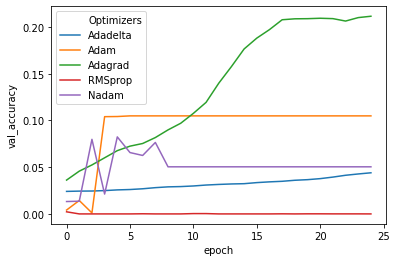

In [107]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Optimizers', data=df);

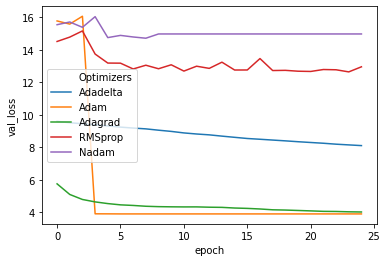

In [108]:
sns.lineplot(x='epoch', y='val_loss', hue='Optimizers', data=df);

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
In training feedforward neural networks for supervised learning. Generalizations of backpropagation exist for other artificial neural networks, and for functions generally – a class of algorithms referred to generically as "backpropagation".
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


